In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset = torchvision.datasets.CIFAR10(root = './data',train = True, download = True,transform = transform)
testset = torchvision.datasets.CIFAR10(root = './data',train = False, download = True,transform = transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
trainset[0]

(tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
          [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
          [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
          ...,
          [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
          [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
          [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],
 
         [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
          [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
          [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
          ...,
          [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
          [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
          [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],
 
         [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
          [-0.8431, -1.0000,

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size = 64, shuffle=True, num_workers = 2)
testloader = torch.utils.data.DataLoader(testset,batch_size = 64, shuffle=True, num_workers = 2)

In [ ]:
image,label = trainset[0]
print('Shape:',image.shape, '\Label:',label)

Shape: torch.Size([3, 32, 32]) \Label: 6


**Creating the Network**

In [ ]:
from torch.nn.modules.pooling import MaxPool2d
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv = nn.Sequential(
       nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3,stride=1,padding=1),  # (i-f+2p)/s  + 1  (32-3+2)/1  +1
       nn.MaxPool2d(kernel_size=2,stride=2), # (M-P)/s + 1  (32-2)/2 + 1 = 16
       nn.ReLU(),
       nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3,stride=1,padding=1), 
       nn.MaxPool2d(kernel_size=2,stride=2),   # (M-P)/s + 1  (16-2)/2 +1  = 8
       nn.ReLU()
    )
    self.fc = nn.Sequential(
       nn.Linear(in_features=32*8*8,out_features=64),
       nn.ReLU(),
       nn.Linear(in_features=64,out_features=10)  
    )

  def forward(self,x):
    x = self.conv(x)
    x = x.view(x.size(0),-1)
    x = self.fc(x)
    return x

model = CNN()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr = 0.01)

**Training**

In [ ]:
import time
start_time = time.time()

loss_list = []
accuracy_list = []
for epoch in range(30):
    epoch_loss = 0
    for images, labels in trainloader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    loss_list.append(epoch_loss / len(trainloader))

        
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in trainloader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            accuracy = correct / total
            accuracy_list.append(accuracy)

        print("Epoch [{}/30] Training Accuracy: {:.4f}".format(epoch + 1, correct / total),"Loss: {:.4f}".format(loss_list[-1]))

print("Training took {:.2f} seconds".format(time.time() - start_time))

Epoch [1/30] Training Accuracy: 0.3080 Loss: 2.1137
Epoch [2/30] Training Accuracy: 0.4075 Loss: 1.7140
Epoch [3/30] Training Accuracy: 0.4824 Loss: 1.5133
Epoch [4/30] Training Accuracy: 0.4648 Loss: 1.4055
Epoch [5/30] Training Accuracy: 0.5349 Loss: 1.3284
Epoch [6/30] Training Accuracy: 0.5615 Loss: 1.2653
Epoch [7/30] Training Accuracy: 0.5144 Loss: 1.2118
Epoch [8/30] Training Accuracy: 0.5665 Loss: 1.1631
Epoch [9/30] Training Accuracy: 0.6144 Loss: 1.1148
Epoch [10/30] Training Accuracy: 0.5933 Loss: 1.0736
Epoch [11/30] Training Accuracy: 0.6343 Loss: 1.0342
Epoch [12/30] Training Accuracy: 0.6145 Loss: 0.9974
Epoch [13/30] Training Accuracy: 0.6283 Loss: 0.9634
Epoch [14/30] Training Accuracy: 0.6494 Loss: 0.9337
Epoch [15/30] Training Accuracy: 0.6425 Loss: 0.9049
Epoch [16/30] Training Accuracy: 0.6854 Loss: 0.8756
Epoch [17/30] Training Accuracy: 0.6453 Loss: 0.8535
Epoch [18/30] Training Accuracy: 0.6581 Loss: 0.8314
Epoch [19/30] Training Accuracy: 0.7062 Loss: 0.8065
Ep

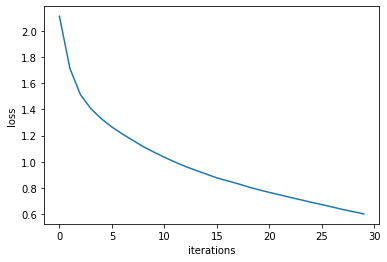

In [ ]:
x = range(30)
plt.plot(x,loss_list)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

**Testing**

In [ ]:
with torch.no_grad():
  correct = 0 
  total = 0
  for images, labels in testloader:
    outputs = model(images)
    _,predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print('Test Accuracy: {:.4f}'.format(correct/total))

Test Accuracy: 0.6490


In [ ]:
from sklearn.metrics import confusion_matrix

model.eval()
with torch.no_grad():
  correct = 0
  total = 0
  confusion_matrix = torch.zeros(10,10)
  for images, labels in testloader:
    outputs = model(images)
    _,predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    for i,j in zip(predicted,labels):
      confusion_matrix[i][j] += 1
confusion_matrix = confusion_matrix.numpy().astype(int)
print('Confusion Matrix')
print(confusion_matrix)

Confusion Matrix
[[777  49  73  24  30   7   6  18  96  47]
 [  8 699   4   3   2   2   2   0  29  44]
 [ 27   6 379  20  33   6  16  13   7   4]
 [ 11   8  27 208  24  26  21  12  10   9]
 [ 12   0  96  31 549  26  33  32   4   5]
 [ 57  50 297 594 219 899 170 207  60  61]
 [ 11  17  69  71  52  11 744   5   9   7]
 [ 15  10  37  29  80  22   4 703   4  23]
 [ 45  21   8   6   8   1   3   0 749  17]
 [ 37 140  10  14   3   0   1  10  32 783]]


In [ ]:
accuracy = (confusion_matrix.diagonal().sum()/confusion_matrix.sum())*100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 64.90%
